In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../../data/raw/landuse.csv')
df.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [6]:
df_cleaned = df.dropna(subset=['landuse'])
# Narrow down to Brooklyn
df_BK_cleaned = df_cleaned[df_cleaned['borough'] == 'BK']
df_BK_cleaned = df_BK_cleaned[~df_BK_cleaned['zipcode'].isna()]
df_BK_cleaned['zipcode'] = df_BK_cleaned['zipcode'].astype(int)
df_BK_cleaned = df_BK_cleaned[(df_BK_cleaned['zipcode'] >= 11201) & (df_BK_cleaned['zipcode'] <= 11256)]
print(f'The cleaned whole dataset shape is {df_cleaned.shape}, and the cleaned Brooklyn landuse data shape is {df_BK_cleaned.shape}.')
df_BK_cleaned

The cleaned whole dataset shape is (855818, 92), and the cleaned Brooklyn landuse data shape is (274809, 92).


,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
7,BK,4052,31,305.0,3116400.0,3.116400e+10,1164.0,2001.0,19.0,42.0,11208,L107,75.0,33.0,6200.0,3.0,5.0,3E,546 SHEPHERD AVENUE,R5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,"ROSS, AVIAN T",2500.0,2340.0,0.0,2340.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,25.00,100.00,20.5,55.0,G,1.0,N,5.0,2.0,12900.0,61800.0,0.0,1901.0,0.0,0.0,NaN,NaN,0.94,1.25,0.0,2.0,3,3.040520e+09,NaN,1164.0,1017457.0,183727.0,17d,NaN,308 018,31304.0,NaN,NaN,NaN,1,NaN,NaN,24v1,NaN,40.670903,-73.880293,NaN
38,BK,5838,45,310.0,3003000.0,3.003000e+10,30.0,1004.0,20.0,47.0,11220,E241,68.0,31.0,7600.0,3.0,10.0,1E,6672 SEDGWICK PLACE,R4A,NaN,NaN,NaN,NaN,NaN,BR,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"CHAN, CHAI KWAN",4467.0,2874.0,0.0,2874.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,44.67,100.00,18.0,38.0,G,1.0,N,5.0,2.0,24300.0,115500.0,0.0,1925.0,2008.0,0.0,NaN,NaN,0.64,0.75,0.0,2.0,3,3.058380e+09,NaN,30.0,976098.0,172352.0,22a,NaN,306A009,31801.0,NaN,NaN,NaN,1,NaN,NaN,24v1,NaN,40.639739,-74.029373,NaN
39,BK,773,62,307.0,3007800.0,3.007800e+10,78.0,1000.0,15.0,38.0,11220,E201,72.0,39.0,6500.0,3.0,7.0,3C,329 49 STREET,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,C0,2.0,0.0,NaN,"ZHENG, YAN",2003.0,3000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,3.0,3.0,20.00,100.17,20.0,50.0,N,2.0,N,5.0,2.0,16200.0,82800.0,0.0,1910.0,0.0,0.0,NaN,NaN,1.50,2.00,0.0,2.0,3,3.007730e+09,NaN,78.0,980602.0,175359.0,22a,NaN,306A019,30305.0,NaN,NaN,NaN,1,NaN,NaN,24v1,NaN,40.647996,-74.013146,NaN
40,BK,790,24,307.0,3007800.0,3.007800e+10,78.0,4001.0,15.0,38.0,11220,E201,72.0,39.0,6500.0,3.0,7.0,3C,342 50 STREET,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B9,1.0,0.0,NaN,"GAO, XING",2003.0,2520.0,0.0,1680.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,20.00,100.17,20.0,45.0,N,3.0,N,5.0,1.0,16380.0,81420.0,0.0,1910.0,0.0,0.0,NaN,NaN,1.26,2.00,0.0,2.0,3,3.007900e+09,NaN,78.0,980420.0,174970.0,22a,NaN,306A019,30306.0,NaN,NaN,NaN,1,NaN,NaN,24v1,NaN,40.646928,-74.013802,NaN
41,BK,728,31,307.0,3008200.0,3.008200e+10,82.0,2002.0,15.0,38.0,11232,E201,72.0,39.0,6600.0,3.0,7.0,2E,358 43 STREET,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V0,11.0,0.0,NaN,VIKING ESTATES LLC,2504.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,0.0,0.0,25.00,100.17,0.0,0.0,NaN,0.0,N,5.0,5.0,16980.0,16980.0,0.0,0.0,2012.0,0.0,NaN,NaN,0.00,2.00,0.0,2.0,3,3.007280e+09,NaN,82.0,981648.0,176322.0,16b,NaN,306A021,30304.0,NaN,NaN,NaN,1,NaN,NaN,24v1,NaN,40.650639,-74.009377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858560,BK,4252,21,305.0,3120000.0,3.120000e+10,1200.0,2007.0,19.0,42.0,11208,L107,75.0,33.0,6410.0,3.0,5.0,3C,CRESCENT STREET,R5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V0,11.0,0.0,NaN,LILLANEY SANTOSH C,17.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,0.0,0.0,2.08,8.50,0.0,0.0,NaN,0.0,Y,3.0,5.0,60.0,60.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,1.25,0.0,2.0,3,3.042520e+0

In [7]:
aggregated_data = df_BK_cleaned.groupby('landuse')['borough'].agg('count')
aggregated_data

landuse
1.0     155869
2.0      65257
3.0       3705
4.0      24694
5.0       5603
6.0       4010
7.0       1780
8.0       4225
9.0       1214
10.0      3018
11.0      5434
Name: borough, dtype: int64

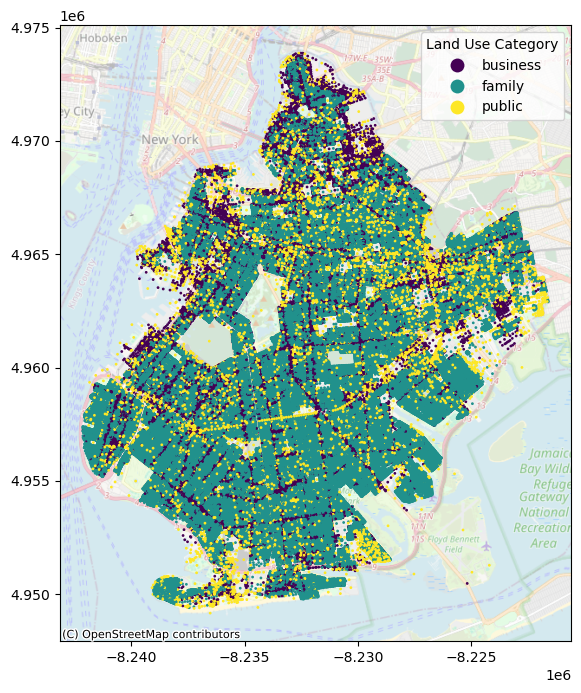

In [11]:
import contextily as ctx

category_mapping = {1: 'family', 2: 'family', 3: 'family',
                    4: 'business', 5: 'business', 6: 'business',
                    7: 'public', 8: 'public', 9: 'public', 10: 'public', 11: 'public'}
df_BK_cleaned['category'] = df_BK_cleaned['landuse'].map(category_mapping)

gdf = gpd.GeoDataFrame(df_BK_cleaned, geometry=gpd.points_from_xy(df_BK_cleaned['longitude'], df_BK_cleaned['latitude']))

gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, column='category', legend=True, markersize=1, categorical=True, cmap='viridis', legend_kwds={'title': 'Land Use Category'})

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

plt.show()

In [60]:
landuse = pd.read_csv('../../data/processed_data/landuse.csv')
landuse.head()

,zipcode,Business,Public,Residential,total_landuse_area_sqft,Business_density,Public_density,Residential_density
0,11201,53562354.0,15175007.0,23128365.0,91865726.0,0.583050,0.165187,0.251763
1,11203,5590590.0,9289328.0,25421211.0,40301129.0,0.138720,0.230498,0.630782
2,11204,5878732.0,4325675.0,27240044.0,37444451.0,0.156999,0.115522,0.727479
3,11205,11069284.0,4308373.0,15582038.0,30959695.0,0.357539,0.139161,0.503301
4,11206,20191885.0,5545977.0,25769741.0,51507603.0,0.392018,0.107673,0.500309


In [61]:
data = gpd.read_file("../../data/raw/ZIP_CODE_040114.shp")
data.head(3)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."


In [62]:
data['ZIPCODE'] = data['ZIPCODE'].astype(int)
data_bk = data[(data['ZIPCODE'] >= 11201) & (data['ZIPCODE'] <= 11256)]
data_bk.head(3)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."


In [63]:
merged_df = pd.merge(data_bk, landuse, left_on='ZIPCODE', right_on='zipcode', how='inner')
merged_df

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,zipcode,Business,Public,Residential,total_landuse_area_sqft,Business_density,Public_density,Residential_density
0,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,5327324.0,3480718.0,25284240.0,34092282.0,0.156262,0.102097,0.741641
1,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,9686094.0,5368412.0,28256031.0,43310537.0,0.223643,0.123952,0.652405
2,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,7868115.0,2554369.0,21182554.0,31605038.0,0.248951,0.080822,0.670227
3,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,6922363.0,2841905.0,26345333.0,36109601.0,0.191704,0.078702,0.729594
4,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.473 177865.718, 994891.817 17...",11226,9801414.0,2790225.0,36865969.0,49457608.0,0.198178,0.056416,0.745405
5,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.352 173946.462, 987259.064 17...",11219,10198773.0,5623325.0,27342958.0,43165056.0,0.236274,0.130275,0.633451
6,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.010 171110.067, 996064.127 17...",11210,5051282.0,4512554.0,26227650.0,35791486.0,0.141131,0.126079,0.732790
7,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.296 171240.706, 994181.969 17...",11230,7074178.0,3202709.0,33920160.0,44197047.0,0.160060,0.072464,0.767476
8,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.170 170730.169, 989536.543 17...",11204,5878732.0,4325675.0,27240044.0,37444451.0,0.156999,0.115522,0.727479
9,11222,0,Brooklyn,36315.0,4.282529e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((996935.763 208556.509, 996946.605 20...",11222,21111884.0,1961459.0,15149584.0,38222927.0,0.552336,0.051316,0.396348


In [64]:
merged_df = merged_df.drop(index=20)

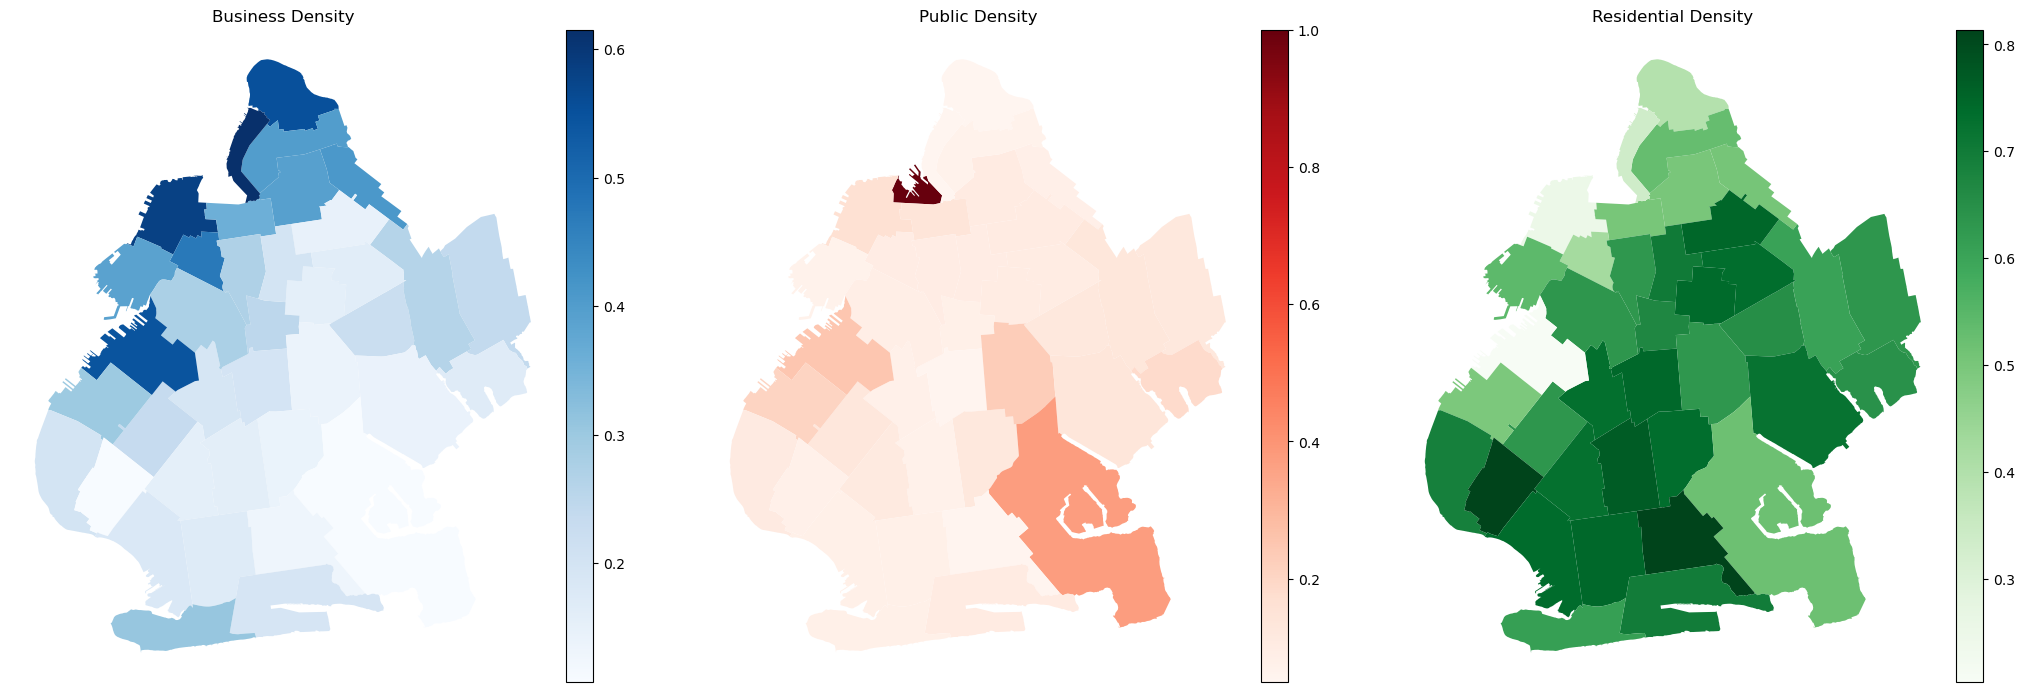

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 3, figsize=(21, 7))

divider0 = make_axes_locatable(ax[0])
divider1 = make_axes_locatable(ax[1])
divider2 = make_axes_locatable(ax[2])

cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)

merged_df.plot(column='Business_density', ax=ax[0], legend=True, cax=cax0, cmap='Blues')
ax[0].set_title('Business Density')
ax[0].axis('off')

merged_df.plot(column='Public_density', ax=ax[1], legend=True, cax=cax1, cmap='Reds')
ax[1].set_title('Public Density')
ax[1].axis('off')

merged_df.plot(column='Residential_density', ax=ax[2], legend=True, cax=cax2, cmap='Greens')
ax[2].set_title('Residential Density')
ax[2].axis('off')

plt.tight_layout()
plt.show()